# Working on Real Estate Investment Trust 

In [1]:
import pandas as pd
import numpy as np


In [2]:
# Lets Import Data
file_path='https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-SkillsNetwork/labs/FinalModule_Coursera/data/kc_house_data_NaN.csv'
df=pd.read_csv(file_path)

In [3]:
df.head()

,Unnamed: 0,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,0,7129300520,20141013T000000,221900.0,3.0,1.00,1180,5650,1.0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,1,6414100192,20141209T000000,538000.0,3.0,2.25,2570,7242,2.0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,2,5631500400,20150225T000000,180000.0,2.0,1.00,770,10000,1.0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,3,2487200875,20141209T000000,604000.0,4.0,3.00,1960,5000,1.0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,4,1954400510,20150218T000000,510000.0,3.0,2.00,1680,8080,1.0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [4]:
df.drop(columns=['Unnamed: 0'],inplace=True)

In [5]:
df.shape

(21613, 21)

In [6]:
df.dtypes

id                 int64
date              object
price            float64
bedrooms         float64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [7]:
# Data Wrangling
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21600.000000,21603.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.372870,2.115736,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.926657,0.768996,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,1.000000,0.500000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [8]:
df.drop(columns=['id'],inplace=True)

In [9]:
print('Number of NaN values for the columns bedrooms :',df['bedrooms'].isnull().sum())

Number of NaN values for the columns bedrooms : 13


In [10]:
means=df['bedrooms'].mean()
df['bedrooms']=df['bedrooms'].replace(np.NaN,means)

In [11]:
df['bedrooms'].isna().sum()

0

In [12]:
print('Number of NaN values for the column bathrooms :',df['bathrooms'].isnull().sum())


Number of NaN values for the column bathrooms : 10


In [13]:
means_=df['bathrooms'].mean()
df['bathrooms']=df['bathrooms'].replace(np.NaN,means)

In [14]:
df['bathrooms'].isna().sum()

0

In [15]:
# Exploratory Data Analysis
unique_floor=df['floors'].value_counts()

In [16]:
unique_floor=unique_floor.to_frame()


In [17]:
unique_floor

,count
floors,
1.0,10680
2.0,8241
1.5,1910
3.0,613
2.5,161
3.5,8


In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

(0.0, 8081250.0)

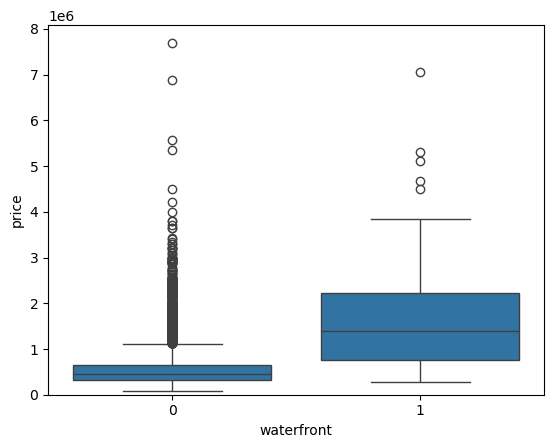

In [21]:
sns.boxplot(x='waterfront',y='price',data=df)
plt.ylim(0,)

In [ ]:
# This Graph shows that there are more outliers without a waterview

## Reg Models

In [22]:
df_numeric=df.select_dtypes(include=['int64','float64']).corr()

In [23]:
df_numeric

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
price,1.000000,0.308797,0.525223,0.702035,0.089661,0.256794,0.266369,0.397293,0.036362,0.667434,0.605567,0.323816,0.054012,0.126434,-0.053203,0.307003,0.021626,0.585379,0.082447
bedrooms,0.308797,1.000000,0.513296,0.578077,0.032307,0.178022,-0.006800,0.080058,0.026690,0.356589,0.479286,0.302856,0.155749,0.018456,-0.153736,-0.009735,0.130978,0.393356,0.030430
bathrooms,0.525223,0.513296,1.000000,0.754540,0.087897,0.502180,0.063639,0.188388,-0.126711,0.663393,0.685746,0.282755,0.506605,0.050370,-0.205046,0.024012,0.225668,0.569018,0.087610
sqft_living,0.702035,0.578077,0.754540,1.000000,0.172826,0.353949,0.103818,0.284611,-0.058753,0.762704,0.876597,0.435043,0.318049,0.055363,-0.199430,0.052529,0.240223,0.756420,0.183286
sqft_lot,0.089661,0.032307,0.087897,0.172826,1.000000,-0.005201,0.021604,0.074710,-0.008958,0.113621,0.183512,0.015286,0.053080,0.007644,-0.129574,-0.085683,0.229521,0.144608,0.718557
floors,0.256794,0.178022,0.502180,0.353949,-0.005201,1.000000,0.023698,0.029444,-0.263768,0.458183,0.523885,-0.245705,0.489319,0.006338,-0.059121,0.049614,0.125419,0.279885,-0.011269
waterfront,0.266369,-0.006800,0.063639,0.103818,0.021604,0.023698,1.000000,0.401857,0.016653,0.082775,0.072075,0.080588,-0.026161,0.092885,0.030285,-0.014274,-0.041910,0.086463,0.030703
view,0.397293,0.080058,0.188388,0.284611,0.074710,0.029444,0.401857,1.000000,0.045990,0.251321,0.167649,0.276947,-0.053440,0.103917,0.084827,0.006157,-0.078400,0.280439,0.072575
condition,0.036362,0.026690,-0.126711,-0.058753,-0.008958,-0.263768,0.016653,0.045990,1.000000,-0.144674,-0.158214,0.174105,-0.361417,-0.060618,0.003026,-0.014941,-0.106500,-0.092824,-0.003406
grade,0.667434,0.356589,0.663393,0.762704,0.113621,0.458183,0.082775,0.251321,-0.144674,1.000000,0.755923,0.168392,0.446963,0.014414,-0.184862,0.114084,0.198372,0.713202,0.119248


(0.0, 8081250.0)

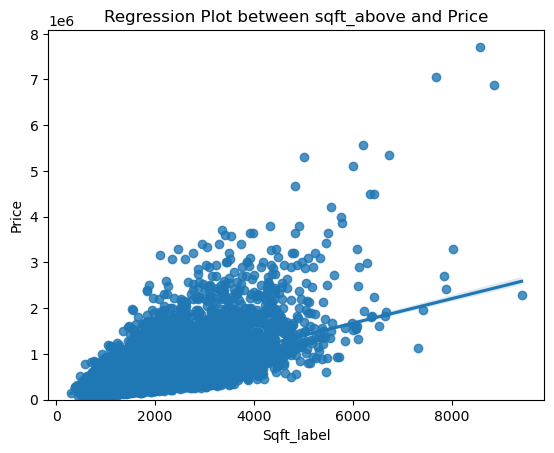

In [24]:
# Lets check sqft_above is negatively or positively correlated
sns.regplot(x='sqft_above',y='price',data=df)
plt.xlabel('Sqft_label')
plt.ylabel('Price')
plt.title('Regression Plot between sqft_above and Price')
plt.ylim(0,)

In [25]:
from scipy.stats import pearsonr


In [26]:
corr,p_value=pearsonr(df['sqft_above'],df['price'])
print(f'Coorelation between sqft_above and price is {corr} and p_value is {p_value}')

Coorelation between sqft_above and price is 0.6055672983560781 and p_value is 0.0


In [31]:
unique_corr_price=df.select_dtypes(include=['int64','float64']).corr()['price'].sort_values(ascending=False).reset_index()

In [32]:
unique_corr_price

,index,price
0,price,1.000000
1,sqft_living,0.702035
2,grade,0.667434
3,sqft_above,0.605567
4,sqft_living15,0.585379
5,bathrooms,0.525223
6,view,0.397293
7,sqft_basement,0.323816
8,bedrooms,0.308797
9,lat,0.307003


In [ ]:
# There's a postive coorelation between variable sqft_above and price

## Model Development

In [33]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures


In [34]:
x=df[['long']]
y=df[['price']]
lr=LinearRegression()


In [35]:
lr.fit(x,y)

LinearRegression()

In [36]:
lr.coef_

array([[56377.72275781]])

In [37]:
lr.intercept_

array([7430229.31043568])

In [38]:
lr.score(x,y)

0.00046769430149029567

In [39]:
# Lets user sqft_living to predict the values
lr_=LinearRegression()


In [40]:
lr_.fit(df[['sqft_living']],df[['price']])

LinearRegression()

In [42]:
lr_.coef_

array([[280.6235679]])

In [43]:
lr_.intercept_

array([-43580.74309447])

In [47]:
lr_.score(df[['sqft_living']],df[['price']])

0.4928532179037931

In [48]:
# Multiple Regression 
mlr=LinearRegression()
features =["floors", "waterfront","lat" ,"bedrooms" ,"sqft_basement" ,"view" ,"bathrooms","sqft_living15","sqft_above","grade","sqft_living"]     
xtrain,xtest,ytrain,ytest=train_test_split(df[features],df['price'],test_size=0.2,random_state=42)

In [49]:
mlr.fit(xtrain,ytrain)

LinearRegression()

In [50]:
mlr.coef_

array([-3.08510299e+04,  5.84469711e+05,  6.71412460e+05, -2.41002227e+04,
        6.34226278e+01,  6.86005826e+04,  3.42394753e+02,  3.46037525e+00,
        6.49953342e+01,  7.98455658e+04,  1.28417963e+02])

In [51]:
mlr.intercept_

-32306923.638775032

In [52]:
mlr.score(xtrain,ytrain)

0.6564451959483975

In [53]:
mlr.score(xtest,ytest)

0.6613864854958406

In [54]:
yhat=mlr.predict(xtest)

<Axes: xlabel='price', ylabel='Density'>

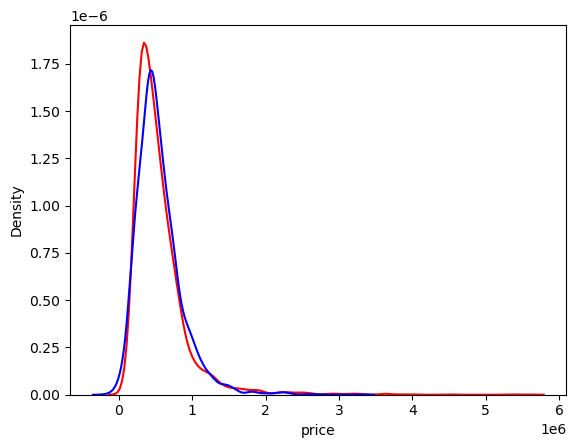

In [55]:
sns.kdeplot(ytest,color='red',label='Test Data')
sns.kdeplot(yhat,color='blue',label='Predicted Data')

In [58]:
# Making PipeLine
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [59]:
input=[('scale',StandardScaler()),('polynomial',PolynomialFeatures(include_bias=False)),('model',LinearRegression())]

In [60]:
pipe=Pipeline(input)

In [61]:
pipe.fit(df[features],df['price'])

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

In [63]:
pipe.score(df[features],df['price'])

0.7513166249467718

In [64]:
yhat_=pipe.predict(xtest)

<Axes: xlabel='price', ylabel='Density'>

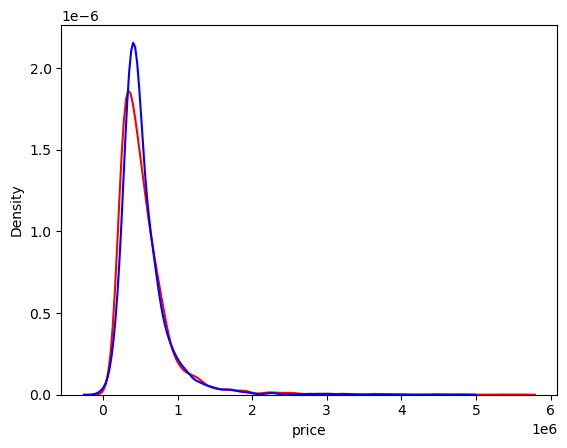

In [65]:
sns.kdeplot(ytest,color='red',label='Test Data')
sns.kdeplot(yhat_,color='blue',label='Predicted Data')

In [66]:
from sklearn.model_selection import cross_val_score

rcross=cross_val_score(pipe,df[features],df['price'],cv=4)

In [67]:
rcross

array([0.75281142, 0.73974536, 0.6870598 , 0.73451038])

In [68]:
from sklearn.linear_model import Ridge
rid=Ridge(alpha=0.1)


In [69]:
rid.fit(xtrain,ytrain)

Ridge(alpha=0.1)

In [70]:
rid.score(xtest,ytest)

0.6613818378106913

In [74]:
pr=PolynomialFeatures(degree=2)
xtrain_pr=pr.fit_transform(xtrain)
xtest_pr=pr.fit_transform(xtest)


In [75]:
rid=Ridge(alpha=0.1)
rid.fit(xtrain_pr,ytrain)

Ridge(alpha=0.1)

In [77]:
rid.score(xtrain_pr,ytrain)

0.7921500347865345

In [78]:
rid.score(xtest_pr,ytest)

-10.011013232136591